In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import cv2
from utils import depth2disp

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 5)


In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.empty_cache()

Use a dataset with 45 instances
Batch size 16
Drop last True
Use a dataset with 180 instances
Batch size 16
Drop last True
Epoch:   0 G: [2.91524425e+00 3.18472892e+02 3.16305463e-01 7.15613524e-01] Time: 11.15s
[5.05348825        inf 0.50678182 2.3479749 ]
      Test G: [1.79679582        inf 0.18018909 0.83483552] inf(inf) Time: 1.93s [*]


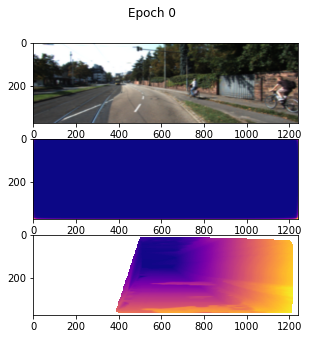

KeyboardInterrupt: 

In [4]:
from model import Model

model = Model(
    use_multiple_gpu=False,
    model_path='model_013',
    batch_size=16,
    val_dataset_dir='data_depth_annotated/val',
    train_dataset_dir='data_depth_annotated/train',
    input_height=128,
    input_width=256,
    learning_rate=1e-3,
    loss_weights=[1.0, 0.1, 1.0, 1.0] # with supervised loss
)

# load from checkpoint
# model.load(True)

fig, ax = plt.subplots(ncols=1, nrows=3)
epochs = 80
idx = 0

for epoch in range(epochs):
    model.train(epoch)
    fig.suptitle('Epoch {}'.format(epoch))
    
    disp_est, left, gt = model.test(epoch, save=True)

    resized_left = cv2.resize(np.moveaxis(left[idx], 0, -1), (1242, 375), interpolation=cv2.INTER_LINEAR)
    resized_disp_est = cv2.resize(np.abs(disp_est[idx]), (1242, 375), interpolation=cv2.INTER_LINEAR)
    resized_gt = cv2.resize(np.moveaxis(depth2disp(gt[idx]), 0, -1), (1242, 375), interpolation=cv2.INTER_LINEAR)
    ax[0].imshow(resized_left)
    ax[1].imshow(resized_disp_est, cmap='plasma') 
    ax[2].imshow(resized_gt, cmap='plasma')
    display.display(plt.gcf())